* Use a composed dataset from kaggle, join and cleanup the data (the requirements here is to open at least 2 files, it doesn’t matter if its csv or json)
* At least 3 histograms on different aggregated data. Do an analysis on which is the optimal bin parameter (the one that maximizes clarity on specified insight). Keep an eye on the dataset you choose, it must have at least 3 numeric columns to operate.
* Plot a scatter distribution of data for a joined column with any column you like
* Create a combined scatterplot with a two series you choosed, it should contain the legend for each scatterplot
* Create a plot for a category distribution (using seaborn violin plot o other kind of graph that fits better your data using catplot) https://seaborn.pydata.org/generated/seaborn.catplot.html
* Do a comparision with 3x3 subplot matrix. Plots can be anything you liked about the dataset



In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [57]:
apple =pd.read_csv('AppleStore.csv')
display((apple).head())

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [58]:
apple2=pd.read_csv('appleStore_description.csv')
display((apple).head())

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [59]:
total=pd.merge(apple,apple2, on='id',how='outer')
display((total).head())

,Unnamed: 0,id,track_name_x,size_bytes_x,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,track_name_y,size_bytes_y,app_desc
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Bible,92774400,On more than 250 million devices around the wo...


At least 3 histograms on different aggregated data. Do an analysis on which is the optimal bin parameter (the one that maximizes clarity on specified insight). Keep an eye on the dataset you choose, it must have at least 3 numeric columns to operate.

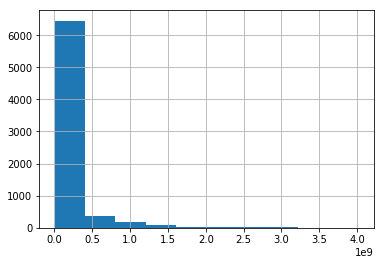

In [60]:
display(total['size_bytes_x'].hist())

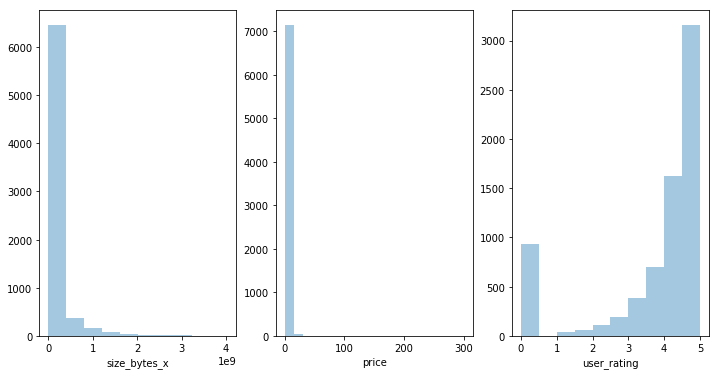

In [61]:
fig,axes= plt.subplots(1,3,figsize=(12,6))
sns.distplot(total['size_bytes_x'], bins=10, kde=False,ax=axes[0])
sns.distplot(total['price'], bins=20, kde=False,ax=axes[1])
sns.distplot(total['user_rating'], bins=10, kde=False,ax=axes[2])

In [62]:
display(total['price'].max())

299.99

In [63]:
display(total['app_desc'].head())

0    SAVE 20%, now only $3.99 for a limited time!\n...
1    Let Evernote change the way you organize your ...
2    Download the most popular free weather app pow...
3    The eBay app is the best way to find anything ...
4    On more than 250 million devices around the wo...
Name: app_desc, dtype: object

In [64]:
total.dtypes
texto=total['app_desc']
texto.astype('str')
type(texto)
total.dtypes


Unnamed: 0            int64
id                    int64
track_name_x         object
size_bytes_x          int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
track_name_y         object
size_bytes_y          int64
app_desc             object
dtype: object

Create a combined scatterplot with a two series you choosed, it should contain the legend for each scatterplot

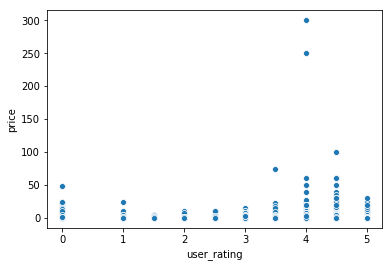

In [65]:
ax = sns.scatterplot(x="user_rating", y="price", data=total)

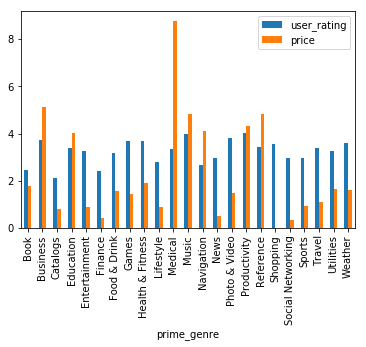

In [66]:
total_bar = total[['user_rating','price','prime_genre']].groupby(["prime_genre"]).agg("mean")
total_bar.plot.bar()

True


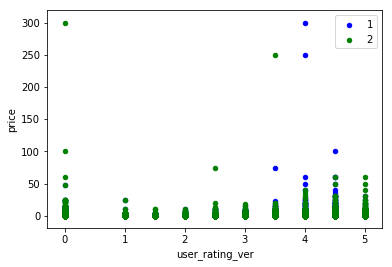

In [83]:
ax1 = total.plot(kind='scatter', x='user_rating', y='price', color='b',label='1')    
ax2 = total.plot(kind='scatter', x='user_rating_ver', y='price', color='g', label= '2',ax=ax1)    

print(ax1 == ax2)


#total_scat = total[['user_rating','price','prime_genre']].groupby(["prime_genre"]).agg("mean")
#total_scat.scatter()

#df = pd.DataFrame(np.random.randn(100, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])


#ax1 = total.plot(kind='scatter', x='prime_genre', y='user_rating', color='r')    
#ax2 = df.plot(kind='scatter', x='prime_genre', y='price', color='g', ax=ax1)    

#print(ax1 == ax2 == ax3)  # True

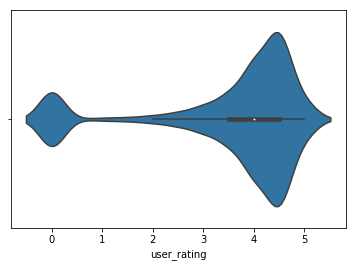

In [78]:
sns.violinplot('user_rating',data=total)

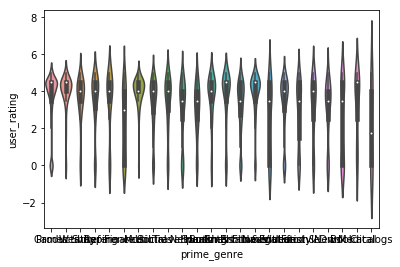

In [85]:
# Pull out a specific subset of networks

sns.violinplot(x='prime_genre', y='user_rating', data=total)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5f16db3240>,
      dtype=object)

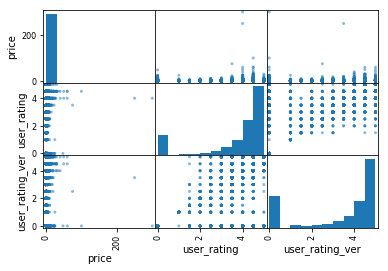

In [87]:
pd.plotting.scatter_matrix(total[['price','user_rating','user_rating_ver']])